<a href="https://colab.research.google.com/github/Gisg22/Defect-detection-in-images/blob/main/Defect_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import kagglehub

path = kagglehub.dataset_download('kaustubhdikshit/neu-surface-defect-database')

print("Path to dataset files:", path)

100%|██████████| 26.4M/26.4M [00:00<00:00, 64.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kaustubhdikshit/neu-surface-defect-database/versions/1


In [2]:
print("Container of directory:", os.listdir(path))

Container of directory: ['NEU-DET']


In [3]:
image_dir = os.path.join(path, "NEU-DET")

In [4]:
image_dir

'/root/.cache/kagglehub/datasets/kaustubhdikshit/neu-surface-defect-database/versions/1/NEU-DET'

In [36]:
import shutil
import random

train_dir = '/root/.cache/kagglehub/datasets/kaustubhdikshit/neu-surface-defect-database/versions/1/NEU-DET/train/images'
test_dir = "/root/.cache/kagglehub/datasets/kaustubhdikshit/neu-surface-defect-database/versions/1/NEU-DET/test/images"

classes = os.listdir(train_dir)

for cls in classes:
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    class_dir = os.path.join(train_dir, cls)
    images = os.listdir(class_dir)
    random.shuffle(images)
    test_count = int(len(images) * 0.1)

    test_images = images[:test_count]

    for img in test_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(test_dir, cls, img)
        shutil.move(src, dst)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/root/.cache/kagglehub/datasets/kaustubhdikshit/neu-surface-defect-database/versions/1/NEU-DET/train/images'
val_dir = '/root/.cache/kagglehub/datasets/kaustubhdikshit/neu-surface-defect-database/versions/1/NEU-DET/validation/images'

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen_val = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = datagen_val.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1296 images belonging to 6 classes.
Found 360 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [38]:
print("Classes:", train_data.class_indices)

Classes: {'crazing': 0, 'inclusion': 1, 'patches': 2, 'pitted_surface': 3, 'rolled-in_scale': 4, 'scratches': 5}


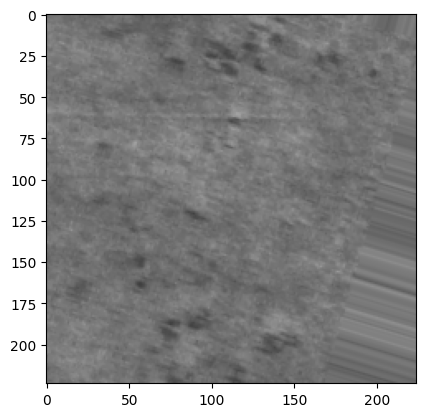

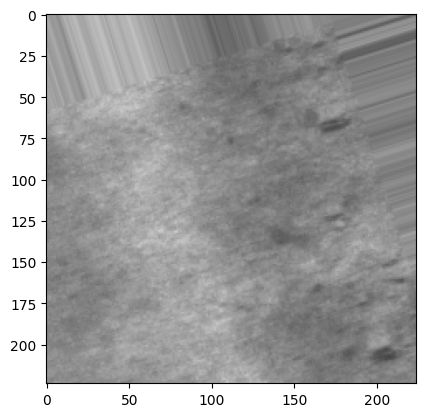

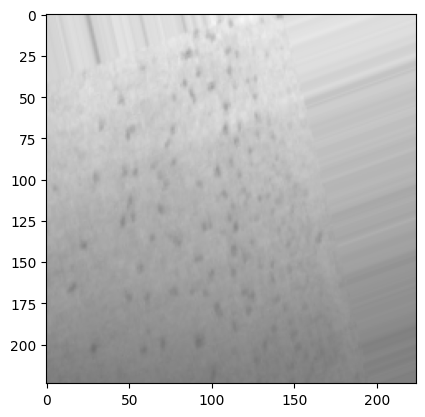

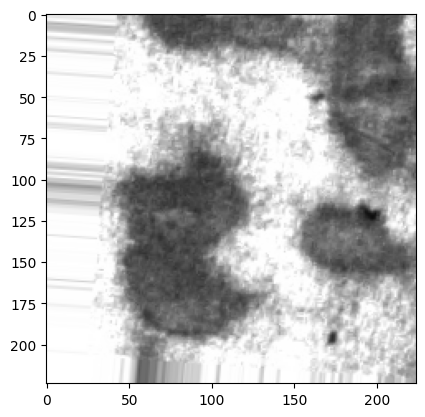

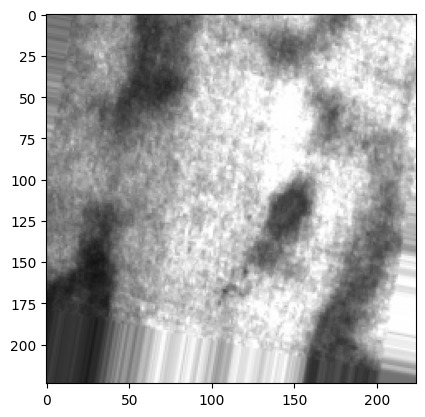

In [39]:
import matplotlib.pyplot as plt

batch = next(train_data)

for i in range(5):
  plt.figure(i)
  plt.imshow(batch[0][i])
plt.show()

In [40]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, Model, regularizers


base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [41]:
from tensorflow.keras.optimizers import Adam

optimizer_ = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer_,
              loss='categorical_crossentropy'
              ,metrics=['accuracy'])

model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5481 - loss: 1.3798 - val_accuracy: 0.8056 - val_loss: 0.4412
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9229 - loss: 0.2399 - val_accuracy: 0.9833 - val_loss: 0.1559
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9528 - loss: 0.1582 - val_accuracy: 0.9778 - val_loss: 0.1285
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.9605 - loss: 0.1213 - val_accuracy: 0.9639 - val_loss: 0.1375
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.9737 - loss: 0.0893 - val_accuracy: 0.9806 - val_loss: 0.0843
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9724 - loss: 0.0945 - val_accuracy: 0.9833 - val_loss: 0.0760
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.9674 - loss: 0.0824 - val_accuracy: 0.9833 - val_loss: 0.0642
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9776 - loss: 0.0742 - val_accuracy: 0.9583 - val_l

In [42]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9654 - loss: 0.0581
Test accuracy: 0.9652777910232544


In [43]:
import numpy as np

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step


array([0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [44]:
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())
print(f'True Classes: {true_classes}, Class Labels: {class_labels}')

True Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5], Class Labels: ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']


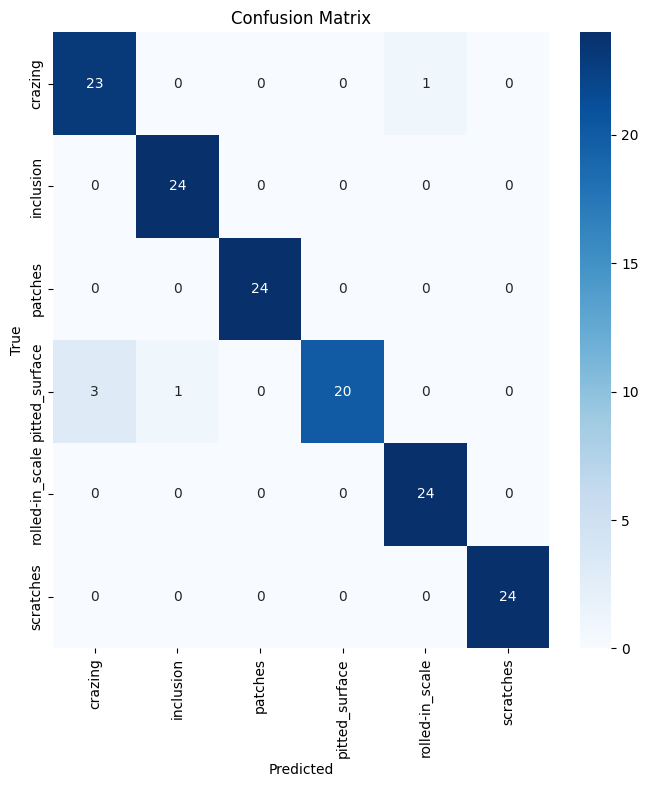

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

                 precision    recall  f1-score   support

        crazing       0.88      0.96      0.92        24
      inclusion       0.96      1.00      0.98        24
        patches       1.00      1.00      1.00        24
 pitted_surface       1.00      0.83      0.91        24
rolled-in_scale       0.96      1.00      0.98        24
      scratches       1.00      1.00      1.00        24

       accuracy                           0.97       144
      macro avg       0.97      0.97      0.96       144
   weighted avg       0.97      0.97      0.96       144



In [47]:
model.save("defect_detector.h5")

In [48]:
from google.colab import files
files.download("defect_detector.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>